# DataJam 2022 - QGis Warriors
Integrantes
- Jácome José
- Parra Karen
- Vasco Danny

## Tipo de reto
Reto #1 - Dateando por el agua

## Descripción
Este Jupyter Notebook está dirigido a visualizar los datos filtrados que se entregaron como parte de los datos del concurso

## Objetivo
- Visualizar regiones, provincias, cantones y parroquias con mayor presencia de autorizaciones para el uso del agua. 
- Visualizar crecimiento poblacional de regiones candidatas (TODO)

## Instrucciones
- Descargar los datos del Reto 1 y descomprimir en la carpeta `Reto1` de esta repositorio, los datos del Reto 1 estan en el siguiente [link de descarga ](
https://drive.google.com/drive/folders/1NnBdtYvd4XdZ8e349c6PDfByzIyvaAZ6?usp=sharing
)

## Sección de Carga de Librerías y Constantes

In [40]:
import os

import numpy as np
import pandas as pd

RUTA_ARCHIVOS_PREPROCESAR = "Insumos/Preprocesamiento"
RUTA_ARCHIVOS_PROCESADOS = "Resultados/Preprocesamiento"

RUTA_RECURSO_HIDRICO_FILTRADO = os.path.join(
    RUTA_ARCHIVOS_PROCESADOS,
    "Autorizaciones del Recurso Hídrico_filtrado.xlsx"
)
RUTA_PROYECCION_POBLACIONAL = os.path.join(
    RUTA_ARCHIVOS_PREPROCESAR,
    "Proyección Poblacional cantonal 2010-2020.xlsx"
)

In [41]:
df_proyeccion_cantonal = pd.read_excel(RUTA_PROYECCION_POBLACIONAL, header=2) # Header 2, cargar a partir de la segunda fila
df_recurso_hidrico_base_datos_filtrado = pd.read_excel(RUTA_RECURSO_HIDRICO_FILTRADO)

## Gráfico de frecuencia por autorizaciones del Recurso Hídrico por Region

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Region'}>

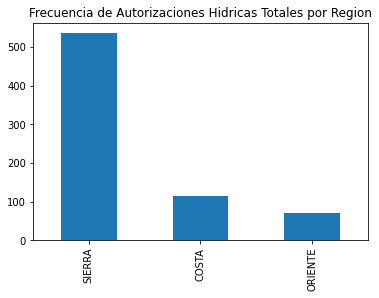

In [42]:
NOMBRE_COLUMNA = "REGION_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Region")

## Gráfico de frecuencia por autorizaciones del Recurso Hídrico por Provincia

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Provincia'}>

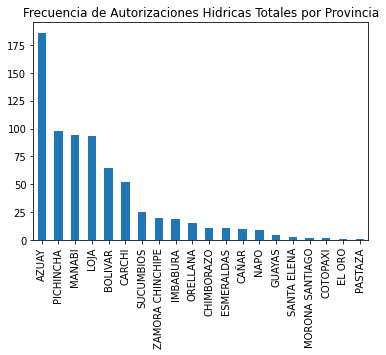

In [43]:
NOMBRE_COLUMNA = "PROVINCIA_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Provincia")

## Grafico de por Cantón

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Cantón'}>

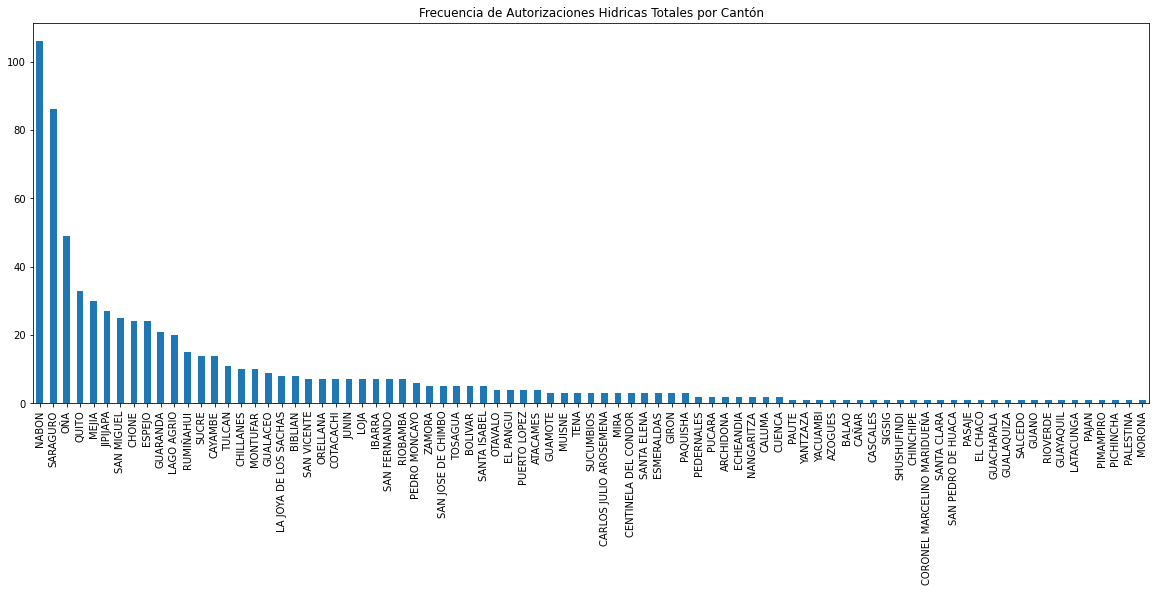

In [44]:
NOMBRE_COLUMNA = "CANTON_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Cantón", figsize=(20, 7))

## Grafico por Parroquia

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Totales por Parroquia'}>

/home/josejacomeb/Documents/scapeye-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


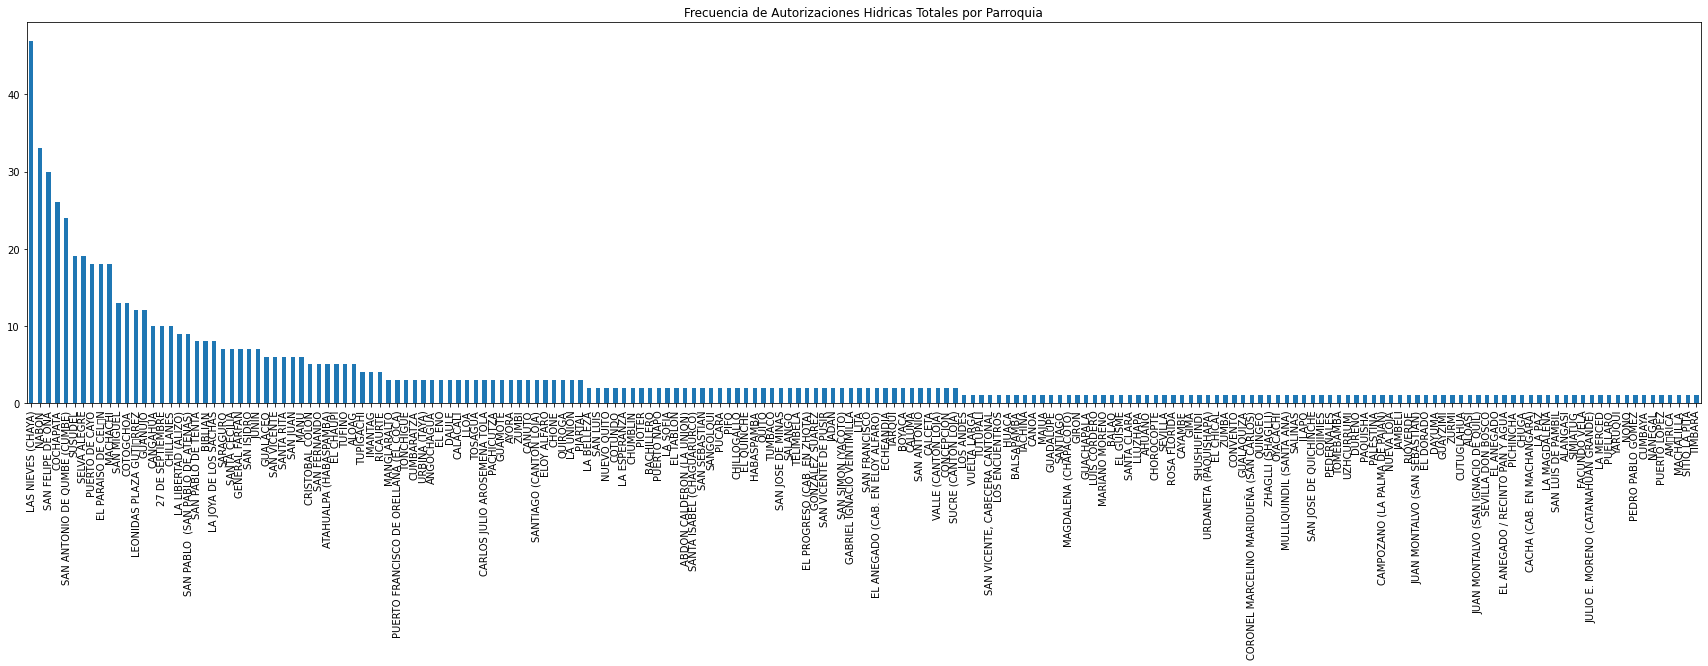

In [45]:
NOMBRE_COLUMNA = "PARROQUIA_FUENTE"
df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Totales por Parroquia", figsize=(30, 7))

## Gráficos de Autorizaciones para el aprovechamiento en el Consumo Humano
### Gráficos por Regiones

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Vigentes para el Consumo Humano por Regiones'}>

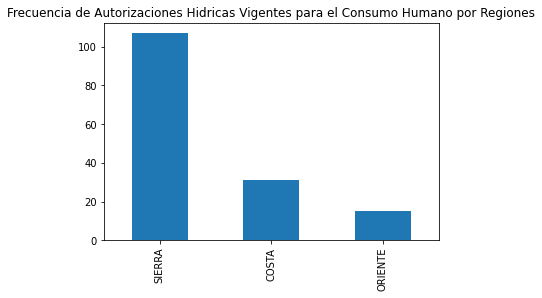

In [46]:
NOMBRE_COLUMNA_APROVECHAMIENTO = "NOMBRE_USO_APROVECHAMIENTO"
NOMBRE_COLUMNA_TRAMITE = "ESTADO_TRAMITE"
df_recurso_hidrico_base_datos_consumo_humano = df_recurso_hidrico_base_datos_filtrado[df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA_APROVECHAMIENTO] == "CONSUMO HUMANO"]
df_recurso_hidrico_base_datos_consumo_humano_vigente = df_recurso_hidrico_base_datos_consumo_humano[df_recurso_hidrico_base_datos_consumo_humano[NOMBRE_COLUMNA_TRAMITE] == "VIGENTE"]

NOMBRE_COLUMNA = "REGION_FUENTE"
df_recurso_hidrico_base_datos_consumo_humano_vigente[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Vigentes para el Consumo Humano por Regiones")

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Vigentes para el Consumo Humano por Provincias'}>

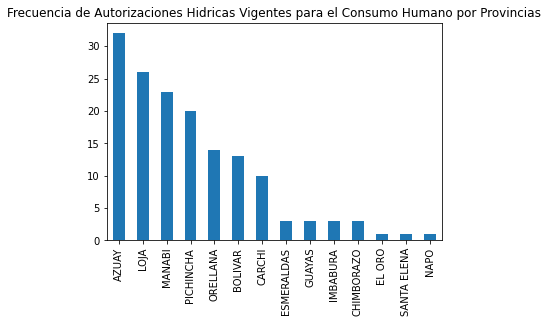

In [55]:
NOMBRE_COLUMNA = "PROVINCIA_FUENTE"
df_recurso_hidrico_base_datos_consumo_humano_vigente[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Vigentes para el Consumo Humano por Provincias")

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Vigentes para el Consumo Humano por cantones'}>

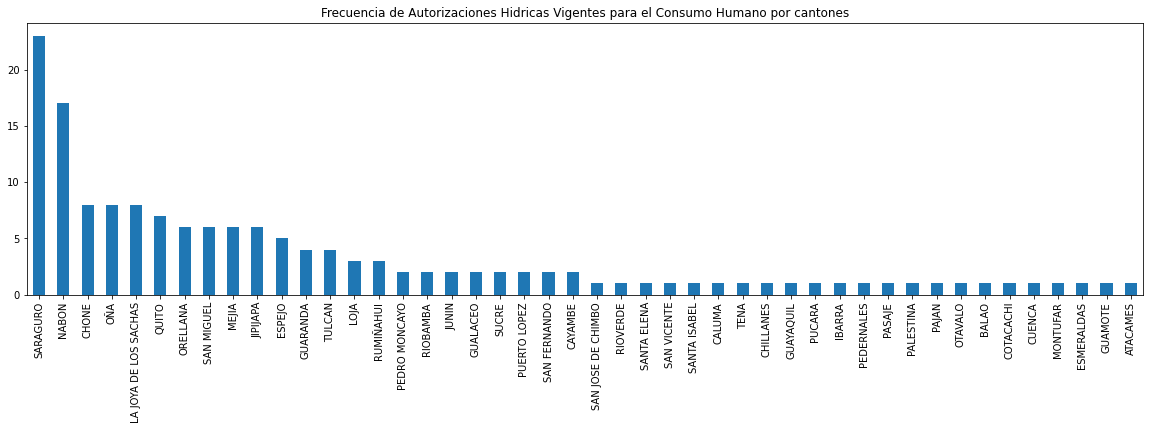

In [48]:
NOMBRE_COLUMNA = "CANTON_FUENTE"
df_recurso_hidrico_base_datos_consumo_humano_vigente[NOMBRE_COLUMNA].value_counts().plot.bar(title="Frecuencia de Autorizaciones Hidricas Vigentes para el Consumo Humano por cantones",
    figsize=(20, 5)
)

<AxesSubplot:title={'center':'Frecuencia de Autorizaciones Hidricas Vigentes por consumo humando por parrroquia'}>

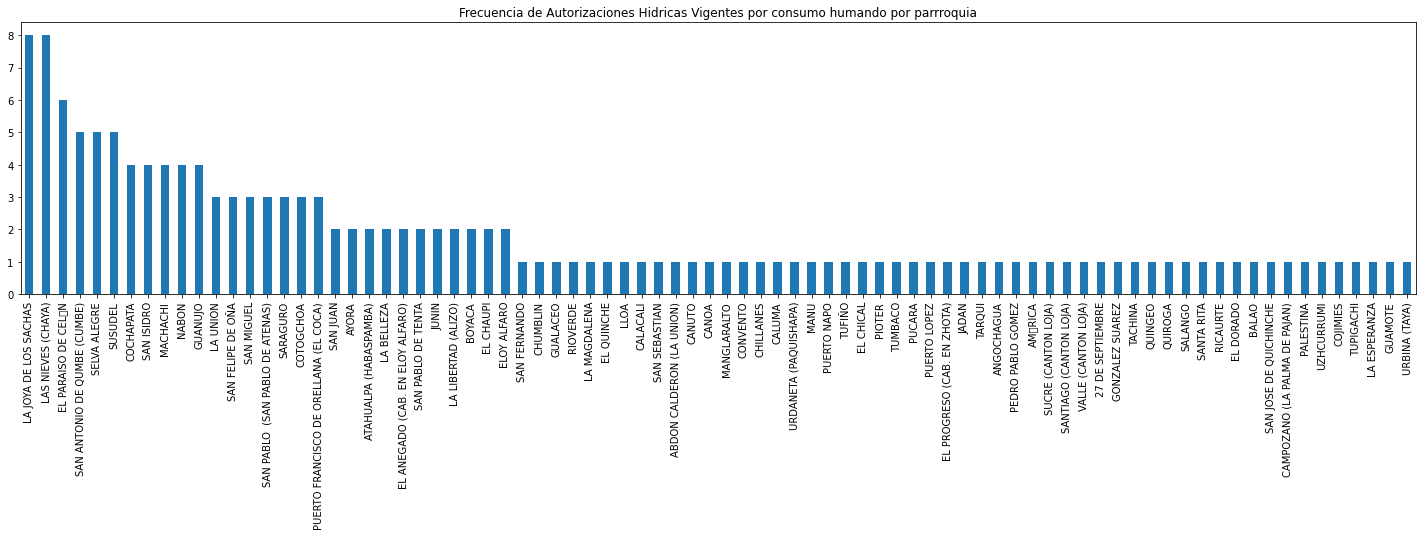

In [49]:
NOMBRE_COLUMNA = "PARROQUIA_FUENTE"
df_recurso_hidrico_base_datos_consumo_humano_vigente[NOMBRE_COLUMNA].value_counts().plot.bar(
    title="Frecuencia de Autorizaciones Hidricas Vigentes por consumo humando por parrroquia",
    figsize=(25, 5)
)

## Combinar la información de ambos archivos para hacer un análisis manual de los datos
- Buscar en la base de datos los cantones que tengan autorizaciones de recurso hídricas vigentes y que sea para consumo humano
- Buscar la tasa de crecimiento de las poblaciones
- Determina la tasa de autorizaciones vigentes para consumo humano por población al 2020 
- Añadir la provincia al que pertenece el cantón automáticamente al documento procesado

In [50]:
NOMBRE_COLUMNA_CANTONES = "CANTON_FUENTE"
NOMBRE_COLUMNA_APROVECHAMIENTO = "NOMBRE_USO_APROVECHAMIENTO"
NOMBRE_COLUMNA_PROYECCION_CANTONES = "Nombre de canton"
cantones_recursos_hidricos = df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA_CANTONES].value_counts().index.tolist()
contador = 0
COLUMNAS_FILTRAR_NUMERICAS = [
    2010,
    2011,
    2012,
    2013,
    2014,
    2015,
    2016,
    2017,
    2018,
    2019,
    2020,
]
nombres_cantones = df_proyeccion_cantonal[NOMBRE_COLUMNA_PROYECCION_CANTONES].values.tolist()
tasas_crecimiento_cantones=[]
numero_vigente_consumo_humano = []
tasa_población_2020_autorizaciones = []
nombres_provincias = []
for canton in nombres_cantones:
    df_proyeccion_por_canton = df_proyeccion_cantonal[df_proyeccion_cantonal[NOMBRE_COLUMNA_PROYECCION_CANTONES] == canton]
    df_proyeccion_columna = pd.DataFrame(
        df_proyeccion_por_canton,
        columns=COLUMNAS_FILTRAR_NUMERICAS
    )
    tasa_crecimiento = df_proyeccion_columna.iloc[0].pct_change().mean()
    tasas_crecimiento_cantones.append(tasa_crecimiento)
    numero_vigente_consumo_humano_canton = 0
    poblacion_2020 = df_proyeccion_columna[2020].values[0]
    ratio_poblacion_autorizaciones_canton = "NO REGISTRADO" # No hay sino es que no hay datos de autorizaciones
    autorizacion_consumo_canton = 0
    provincia = "NO REGISTRADO"
    # Si el nombre del canton aparece en la otra base de datos
    if df_recurso_hidrico_base_datos_consumo_humano_vigente[NOMBRE_COLUMNA_CANTONES].isin([canton]).any():
        df_recurso_hidrico_canton = df_recurso_hidrico_base_datos_consumo_humano_vigente[
            df_recurso_hidrico_base_datos_consumo_humano_vigente[NOMBRE_COLUMNA_CANTONES] == canton
        ]
        numero_vigente_consumo_humano_canton = df_recurso_hidrico_canton[NOMBRE_COLUMNA_CANTONES].value_counts()
        numero_vigente_consumo_humano_canton = numero_vigente_consumo_humano_canton.filter(items=[canton]).values[0]
        ratio_poblacion_autorizaciones_canton = numero_vigente_consumo_humano_canton/ poblacion_2020
        # Obtener nombre de provincia de la base de datos del Recurso Hídrico
        df_fila_canton = df_recurso_hidrico_base_datos_filtrado[df_recurso_hidrico_base_datos_filtrado[NOMBRE_COLUMNA_CANTONES] == canton]
        provincia = df_fila_canton["PROVINCIA_FUENTE"].values[0]
    tasa_población_2020_autorizaciones.append(ratio_poblacion_autorizaciones_canton)
    numero_vigente_consumo_humano.append(numero_vigente_consumo_humano_canton)
    nombres_provincias.append(provincia)

## Graficar poblaciones por cantón

Tasa de crecimiento promedio ultimos 10 años 0.012843989067240557


<AxesSubplot:title={'center':'Ultimos 10 datos de poblaciones del Cantón TULCAN'}>

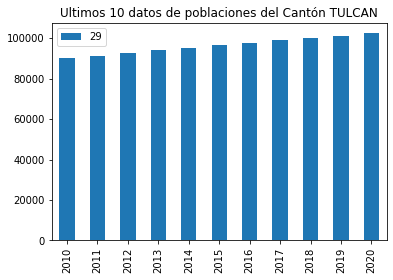

In [51]:
NOMBRE_CANTON = "TULCAN"
df_proyeccion_por_canton = df_proyeccion_cantonal[df_proyeccion_cantonal[NOMBRE_COLUMNA_PROYECCION_CANTONES] == NOMBRE_CANTON]
df_proyeccion_columna = pd.DataFrame(
    df_proyeccion_por_canton,
    columns=COLUMNAS_FILTRAR_NUMERICAS,
    index=None
)
tasa_crecimiento = df_proyeccion_columna.iloc[0].pct_change().mean()
print(f"Tasa de crecimiento promedio ultimos 10 años {tasa_crecimiento}")
df_proyeccion_columna.transpose().plot.bar(title=f"Ultimos 10 datos de poblaciones del Cantón {NOMBRE_CANTON}", label=NOMBRE_CANTON)

## Guardar datos que ayuden a decidir sobre el proceso

In [53]:
df_proyeccion_cantonal_final = df_proyeccion_cantonal.copy()
df_proyeccion_cantonal_final = df_proyeccion_cantonal_final.assign(
    tasas_crecimiento_cantones=tasas_crecimiento_cantones,
    numero_vigente_consumo_humano=numero_vigente_consumo_humano,
    tasa_población_2020_autorizaciones=tasa_población_2020_autorizaciones,
    provincia=nombres_provincias
)
nombre_proyeccion_poblacional_archivo_cambiado = os.path.basename(RUTA_PROYECCION_POBLACIONAL)
nombre_archivo, extension = nombre_proyeccion_poblacional_archivo_cambiado.split(".")
NUEVO_NOMBRE_ARCHIVO = os.path.join(
    RUTA_ARCHIVOS_PROCESADOS,
    f"{nombre_archivo}_procesado.{extension}"
)
df_proyeccion_cantonal_final.to_excel(NUEVO_NOMBRE_ARCHIVO)